In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Sales_Outliers.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
def detect_outlier(data):
    th = 3
    mean = np.mean(data)
    std = np.std(data)
    outliers = []
    for i in data:
        z_score = (i - mean)/std
        if(abs(z_score) > 3 ):
            outliers.append(i)
    return outliers

In [5]:
x = detect_outlier(df['Item_Outlet_Sales'])
len(x)

90

In [6]:
min(x)

7317.142

In [7]:
df[df['Item_Outlet_Sales'] > 7317]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
130,FDY25,NaN,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
145,FDP16,18.600,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
276,FDY55,16.750,Low Fat,0.081253,Fruits and Vegetables,256.4988,OUT013,1987,High,Tier 3,Supermarket Type1,7452.9652
304,DRE60,9.395,Low Fat,0.159658,Soft Drinks,224.9720,OUT045,2002,NaN,Tier 2,Supermarket Type1,7696.6480
333,FDN58,NaN,Regular,0.056597,Snack Foods,230.9984,OUT027,1985,Medium,Tier 3,Supermarket Type3,9267.9360
...,...,...,...,...,...,...,...,...,...,...,...,...
7930,FDP15,NaN,Low Fat,0.083536,Meat,255.4330,OUT027,1985,Medium,Tier 3,Supermarket Type3,9227.9880
8039,FDY55,16.750,Low Fat,0.081485,Fruits and Vegetables,258.0988,OUT045,2002,NaN,Tier 2,Supermarket Type1,8994.9580
8201,FDO03,NaN,Regular,0.036704,Meat,228.1352,OUT027,1985,Medium,Tier 3,Supermarket Type3,9390.4432
8245,FDU55,16.200,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062


## Stanardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
abc = scaling.fit_transform(df[['Item_Outlet_Sales']])

In [12]:
abc

array([[ 0.910601  ],
       [-1.01844035],
       [-0.04923754],
       ...,
       [-0.57909963],
       [-0.19672492],
       [-0.82959407]])

In [13]:
abc[abc>3]

array([3.39135442, 3.04097433, 3.08935644, 3.23216168, 4.15298239,
       3.27117951, 4.08860298, 3.47719364, 3.08389394, 3.11042607,
       3.31253841, 3.26922862, 3.04097433, 4.07416638, 4.15766453,
       4.72069177, 3.10067161, 3.48733827, 5.42886533, 3.20250814,
       3.11940017, 3.55054715, 4.2138502 , 3.9087308 , 3.10418321,
       3.76436484, 3.16973316, 3.85566655, 3.36989461, 3.13695819,
       3.3180009 , 4.27003587, 3.9446272 , 3.11900999, 3.49124005,
       3.01990471, 3.02926899, 3.44714991, 3.16388049, 3.9715495 ,
       4.45302948, 4.14361812, 5.16432446, 3.25869381, 3.56381321,
       3.6519935 , 4.73239712, 4.38552864, 3.70817917, 3.42686064,
       3.20250814, 3.6375569 , 5.82294538, 3.22591883, 4.32544119,
       3.17675637, 3.91887543, 3.69101133, 3.07296895, 3.00976007,
       3.6878899 , 3.05424039, 3.53728109, 3.3414116 , 4.03670927,
       3.8728344 , 4.76166049, 4.32075905, 3.53728109, 3.24542775,
       3.44675973, 3.55366858, 6.39104493, 4.62470792, 3.37457

## Normalization
fit the data into 0 and 1

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
abc = scaling.fit_transform(df[['Item_Outlet_Sales']])

In [25]:
abc

array([[0.28358666],
       [0.03141895],
       [0.15811486],
       ...,
       [0.08885035],
       [0.13883505],
       [0.05610527]])

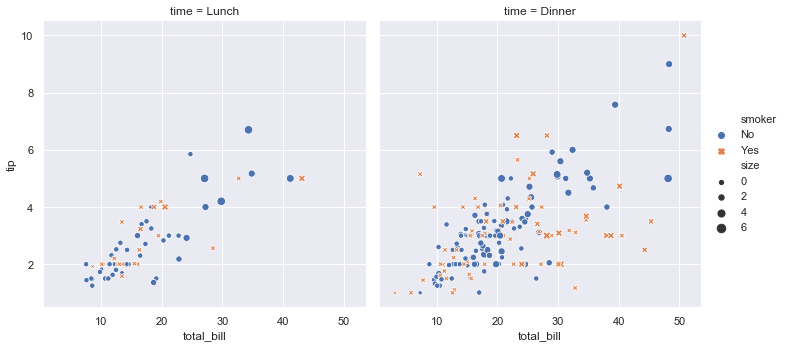

In [36]:
import seaborn as sns
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

In [46]:
df2 = df[['Item_Outlet_Sales']]

In [50]:
df2

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [60]:
df2.index.name = 'Index'

In [68]:
df2['x'] = np.arange(1,8524)

c:\users\nbalg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df2

,Item_Outlet_Sales,x
Index,,
0,3735.1380,1
1,443.4228,2
2,2097.2700,3
3,732.3800,4
4,994.7052,5
...,...,...
8518,2778.3834,8519
8519,549.2850,8520
8520,1193.1136,8521


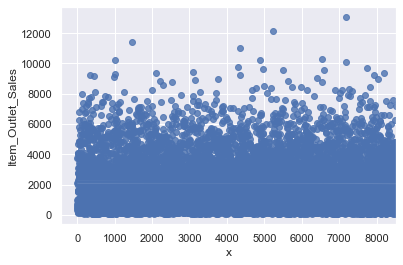

In [78]:
sns.regplot(x='x',y="Item_Outlet_Sales",data=df2)